In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/invstodata/HINDALCO_1D (1).xlsx - HINDALCO.csv


In [2]:
data = pd.read_csv("/kaggle/input/invstodata/HINDALCO_1D (1).xlsx - HINDALCO.csv")
data.head()

,datetime,close,high,low,open,volume,instrument,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,2014-01-24 00:00:00,114.00,115.35,113.00,113.15,5737135,HINDALCO,NaN,NaN,NaN,NaN,NaN
1,2014-01-27 00:00:00,111.10,112.70,109.30,112.00,8724577,HINDALCO,NaN,NaN,NaN,NaN,NaN
2,2014-01-28 00:00:00,113.80,115.00,109.75,110.00,4513345,HINDALCO,NaN,NaN,NaN,NaN,NaN
3,2014-01-29 00:00:00,111.75,114.75,111.15,114.50,4713458,HINDALCO,NaN,NaN,NaN,NaN,NaN
4,2014-01-30 00:00:00,108.10,110.70,107.60,110.20,5077231,HINDALCO,NaN,NaN,NaN,NaN,NaN


In [3]:
data['diff'] = data['close'].diff()
data["direction"] = data['diff'].apply(lambda x: 0 if x > 0 else 1).shift(-1)
    
data.head()

,datetime,close,high,low,open,volume,instrument,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,diff,direction
0,2014-01-24 00:00:00,114.00,115.35,113.00,113.15,5737135,HINDALCO,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2014-01-27 00:00:00,111.10,112.70,109.30,112.00,8724577,HINDALCO,NaN,NaN,NaN,NaN,NaN,-2.90,0.0
2,2014-01-28 00:00:00,113.80,115.00,109.75,110.00,4513345,HINDALCO,NaN,NaN,NaN,NaN,NaN,2.70,1.0
3,2014-01-29 00:00:00,111.75,114.75,111.15,114.50,4713458,HINDALCO,NaN,NaN,NaN,NaN,NaN,-2.05,1.0
4,2014-01-30 00:00:00,108.10,110.70,107.60,110.20,5077231,HINDALCO,NaN,NaN,NaN,NaN,NaN,-3.65,0.0


In [4]:
n_data = data[['close','high','low','direction','open']]
n_data.head()

,close,high,low,direction,open
0,114.00,115.35,113.00,1.0,113.15
1,111.10,112.70,109.30,0.0,112.00
2,113.80,115.00,109.75,1.0,110.00
3,111.75,114.75,111.15,1.0,114.50
4,108.10,110.70,107.60,0.0,110.20


In [5]:
n_data = n_data.dropna()

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(n_data[['open']],n_data[['direction']] , test_size=0.25, random_state=0)

In [7]:
#Import sklearn
from sklearn import linear_model
from sklearn import metrics

digreg = linear_model.LogisticRegression()
y=np.ravel(y_train)
digreg.fit(x_train, y)

y_pred = digreg.predict(x_test)

print("Accuracy of Logistic Regression model is:",
metrics.accuracy_score(y_test, y_pred)*100)


Accuracy of Logistic Regression model is: 48.35526315789473


In [8]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[ 36, 126],
       [ 31, 111]])

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

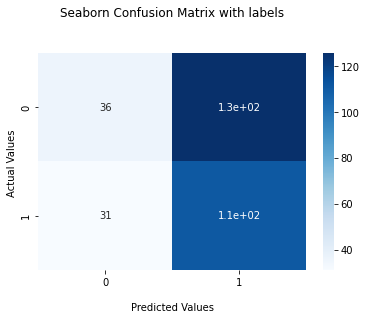

In [9]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
#plt.show()